# Regularyzacja w modelu regresji - zbiór `Hitter`

In [94]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV, cross_val_score , train_test_split
import sklearn.metrics as metrics

from scipy import stats

# Zadanie - `Hitter`

Zbiór `Hitter` (pakiet `ISLR`) zawiera dane z **Major League Baseball** z sezonu 1986 i 1987, zawierają one 322 obserwacje na temat głównych zawodników scharakteryzowanym na podstawie następujących zmiennych: 

``AtBat``
   Number of times at bat in 1986

``Hits``
   Number of hits in 1986

``HmRun``
   Number of home runs in 1986

``Runs``
   Number of runs in 1986

``RBI``
   Number of runs batted in in 1986

``Walks``
   Number of walks in 1986

``Years``
   Number of years in the major leagues

``CAtBat``
   Number of times at bat during his career

``CHits``
   Number of hits during his career

``CHmRun``
   Number of home runs during his career

``CRuns``
   Number of runs during his career

``CRBI``
   Number of runs batted in during his career

``CWalks``
   Number of walks during his career

``League``
   A factor with levels ``A`` and ``N`` indicating player's league at
   the end of 1986

``Division``
   A factor with levels ``E`` and ``W`` indicating player's division at
   the end of 1986

``PutOuts``
   Number of put outs in 1986

``Assists``
   Number of assists in 1986

``Errors``
   Number of errors in 1986

``Salary``
   1987 annual salary on opening day in thousands of dollars

``NewLeague``
   A factor with levels ``A`` and ``N`` indicating player's league at
   the beginning of 1987

1. Podziel zbiór losowo na część treningową i testową w stosunku 7:3

2. Dopasuj model regresji liniowej na danych treningowych, w którym zmienną zależną jest zmienna `Salary` a pozostałe cechy zmiennymi niezależnymi.
Przy użyciu zbioru testowego określ własności predykcyjne modelu korzystając z  następujących miar:
   - błędu średniokwadratowego, 
   - mediany błędu bezwzględnego.
    
    
3. Dopasuj na zbiorze treningowym model regresji grzbietowej:

   a) dla dowolnie wybranego parametru $\alpha$ określ, przy użyciu zbioru testowego, własności predykcyjne modelu korzystając z następujących miar:
   - błędu średniokwadratowego, 
   - mediany błędu bezwzględnego.
   
   b) Korzystając z kroswalidacji na zb. treningowym znajdź optymalną wartość parametru $\alpha$ (`GridSearchCV`)
   
   c) sporządź wykres wartości współczynników regresji względem parametru $\alpha$.

   d) dla optymalnego parametru $\alpha$ określ, przy użyciu zbioru testowego,własności predykcyjne modelu korzystając z następujących miar:
   - błędu średniokwadratowego, 
   - mediany błędu bezwzględnego.
   

4. Dopasuj na zbiorze treningowym model regresji Lasso:

   a) dla dowolnie wybranego parametru $\alpha$ określ, przy użyciu zbioru testowego, własności predykcyjne modelu korzystając z następujących miar:
   - błędu średniokwadratowego, 
   - mediany błędu bezwzględnego.
   
   b) Korzystając z kroswalidacji na zb. treningowym znajdź optymalną wartość parametru $\alpha$ (`GridSearchCV`)
   
   c) sporządź wykres wartości współczynników regresji względem parametru $\alpha$.

   d) dla optymalnego parametru $\alpha$ określ, przy użyciu zbioru testowego,własności predykcyjne modelu korzystając z następujących miar:
   - błędu średniokwadratowego, 
   - mediany błędu bezwzględnego.

In [95]:
hitters = sm.datasets.get_rdataset(dataname="Hitters", package="ISLR", cache=True)
# print(hitters.__doc__)

In [96]:
hitters.data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [97]:
hitters.data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

In [98]:
hitters = hitters.data.dropna()
hitters = hitters.drop(['League', 'Division', 'NewLeague'], axis = 1)  # odrzucamy zmienne kategoryczne (dla wygody)

In [99]:
# podział zbioru na zmienne niezależne i zmienną zależną
X, y = hitters.iloc[:, hitters.columns != 'Salary'], hitters['Salary']

In [100]:
# podział na część treningową i testową
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [101]:
# zwykła regresja liniowa na zbiorze treningowym
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

LinearRegression()

In [102]:
MSE = metrics.mean_squared_error(y_true=y_test, y_pred=model_linear_regression.predict(X_test))
mAE = metrics.median_absolute_error(y_true=y_test, y_pred=model_linear_regression.predict(X_test))

results_linear_regression = {}
results_linear_regression['MSE'] = MSE
results_linear_regression['mAE'] = mAE

results_linear_regression

{'MSE': 153591.3664631573, 'mAE': 185.78945729855388}

(array([108.,  50.,  49.,  27.,  11.,   7.,   2.,   6.,   1.,   2.]),
 array([  67.5 ,  306.75,  546.  ,  785.25, 1024.5 , 1263.75, 1503.  ,
        1742.25, 1981.5 , 2220.75, 2460.  ]),
 <BarContainer object of 10 artists>)

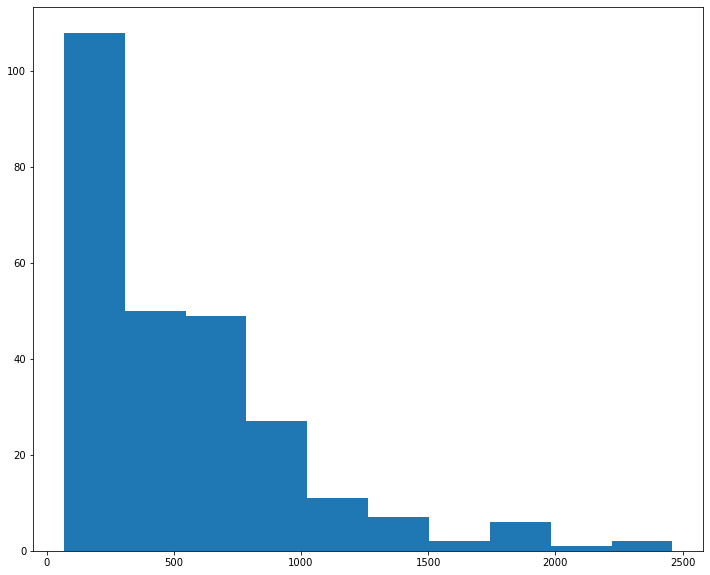

In [103]:
# MSE o wiele większe od MAE --> może być to spowodowane bardzo niesymetrycznym rozkładem y
plt.hist(y)

In [104]:
# Regresja z regularyzacją Ridge

model_ridge_regression = make_pipeline(StandardScaler(), Ridge(alpha=1))
model_ridge_regression.fit(X_train,y_train)  # skalujemy zmienne i dopasowujemy model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1))])

In [105]:
# rozważamy miary MSE, MAE dla konkretnego modelu
def pred_model(model, X, y):
    
    MSE = metrics.mean_squared_error(y_true=y, y_pred=model.predict(X))
    mAE = metrics.median_absolute_error(y_true=y, y_pred=model.predict(X))

    results = {}
    results['MSE'] = MSE
    results['mAE'] = mAE
    
    return results

In [106]:
# lepsza predykcja niż w przypadku zwykłej regresji liniowej

results_ridge_alpha_1 = pred_model(model_ridge_regression, X_test, y_test)
print(results_ridge_alpha_1)

{'MSE': 134271.04286199616, 'mAE': 176.25156300721432}


# `Gridsearch`

In [107]:
# wcześniej patrzyliśmy, jak się to zachowuje dla ustalonego alpha
estimator_ridge = make_pipeline(StandardScaler(), Ridge())

#grid bierze estymator i wyszukuje jak najlepszy jego parametr (w przypadku Ridge czy Lasso chodzi o parametr alpha)
grid = GridSearchCV(estimator=estimator_ridge, 
                    param_grid = {'ridge__alpha': np.linspace(0.01, 15, 100)},
                    scoring='neg_mean_squared_error',
                    cv=10
                    )  # podwójne podkreślenie dla 'ridge__alpha' (parametr prywantny obiektu)

#dopasowujemy model Ridge dla alpha optymalnego dla danych, na których uczymy model
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-02, 1.61414141e-01, 3.12828283e-01, 4.64242424e-01,
       6.15656566e-01, 7.67070707e-01, 9.18484848e-01, 1.06989899e+00,
       1.22131313e+00, 1.37272727e+00, 1.52414141e+00, 1.67555556e+00,
       1.82696970e+00, 1.97838384e+00, 2.129...
       1.15174747e+01, 1.16688889e+01, 1.18203030e+01, 1.19717172e+01,
       1.21231313e+01, 1.22745455e+01, 1.24259596e+01, 1.25773737e+01,
       1.27287879e+01, 1.28802020e+01, 1.30316162e+01, 1.31830303e+01,
       1.33344444e+01, 1.34858586e+01, 1.36372727e+01, 1.37886869e+01,
       1.39401010e+01, 1.40915152e+01, 1.42429293e+01, 1.43943434e+01,
       1.45457576e+01, 1.46971717e+01, 1.48485859e+01, 1.50000000e+01])},
             scoring='neg_mean_squared_error')

In [108]:
print(grid.best_params_)  # najlepsza alpha
print(-grid.best_score_)  # MSE na zbiorze treningowym

{'ridge__alpha': 7.126464646464647}
125304.19838684304


In [109]:
# Ridge z najlepszą alphą

grid_best = grid.best_estimator_
# ridge = make_pipeline(StandardScaler(), Ridge(alpha=grid.best_params_))

In [110]:
# współczynniki

print(grid_best['ridge'].coef_)
grid_best['ridge'].intercept_

[ -89.38100401   42.59806071  -59.14923399   24.36430956   53.65900456
   73.20693542 -117.62467997  -21.41638799  114.72008976   73.37212137
  162.61079791   84.96226087  -46.48752544   96.64608732   47.84189598
  -43.35145484]


546.6096358695652

In [111]:
# dopawowanie modelu do danych testowych

results_ridge_alpha_opt = pred_model(grid.best_estimator_, X_test, y_test) # jeszcze mniejsze niż poprzednio
print(results_ridge_alpha_opt)

{'MSE': 130955.9690405135, 'mAE': 171.409765741356}


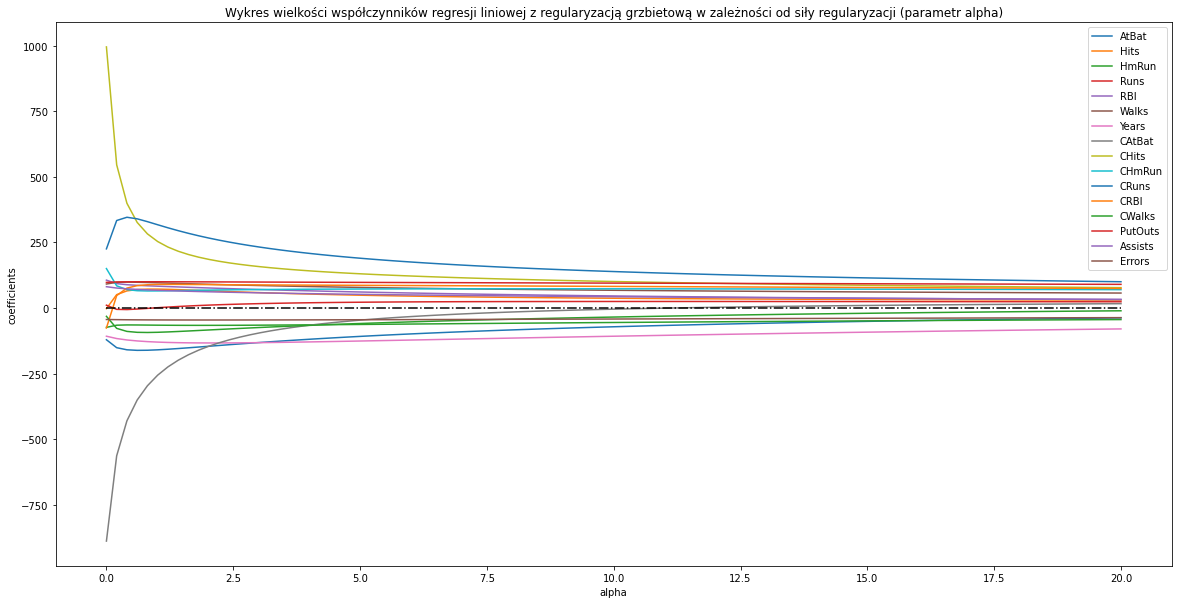

In [112]:
# patrzymy, jak zmieniają się współczynniki beta Ridge wraz ze wzrostem alpha
plt.figure(figsize=(20, 10))

alpha_vec =  np.linspace(0, 20, 100)

coefs = []
for a in alpha_vec:
    
    model_ridge_regression = make_pipeline(StandardScaler(), Ridge(alpha = a))
    
    model_ridge_regression.fit(X_train, y_train)
    coefs.append(model_ridge_regression.named_steps['ridge'].coef_)

plt.plot(alpha_vec, coefs)
plt.plot([np.min(alpha_vec), np.max(alpha_vec)], [0, 0], '-.', color='black')
plt.title('Wykres wielkości współczynników regresji liniowej z regularyzacją grzbietową w zależności od siły regularyzacji (parametr alpha)')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.legend(X.columns)
plt.show()

## Regresja wielomianowa z regularyzacją Ridge

In [113]:
# teraz łączymy regresję wielomianową z regularyzacją Ridge
poly_ridge_estimator = make_pipeline(PolynomialFeatures(include_bias=False), StandardScaler(), Ridge())
poly_ridge_estimator

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [114]:
# bierzemy siatkę potęg wielomianów i siatkę alpha (metoda kosztowna obliczeniowo!)

grid2 = GridSearchCV(estimator=poly_ridge_estimator,
                     param_grid={'polynomialfeatures__degree': [1, 2, 3],
                                 'ridge__alpha': np.linspace(5, 15, 20)
                                },
                     scoring='neg_mean_squared_error',
                     cv=10
                     )

grid2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': array([ 5.        ,  5.52631579,  6.05263158,  6.57894737,  7.10526316,
        7.63157895,  8.15789474,  8.68421053,  9.21052632,  9.73684211,
       10.26315789, 10.78947368, 11.31578947, 11.84210526, 12.36842105,
       12.89473684, 13.42105263, 13.94736842, 14.47368421, 15.        ])},
             scoring='neg_mean_squared_error')

In [115]:
grid2.best_params_ # optymalne parametry

{'polynomialfeatures__degree': 2, 'ridge__alpha': 12.894736842105264}

In [116]:
# miary dają większy nieco wynik dla MSE niż metody bez dodania PolynomialFeatures, ale zdecydowanie mniejszy dla MAE

results_poly_ridge_alpha_opt = pred_model(grid2.best_estimator_, X_test, y_test)
print(results_poly_ridge_alpha_opt)

{'MSE': 131020.951740291, 'mAE': 133.61101160467302}


## Lasso

In [117]:
# Regresja z regularyzacją Lasso

model_lasso_regression = make_pipeline(StandardScaler(), Lasso(alpha=1, max_iter=10_000))
model_lasso_regression.fit(X_train,y_train)  # skalujemy zmienne i dopasowujemy model

results_lasso_alpha_1 = pred_model(model_lasso_regression, X_test, y_test)
print(results_lasso_alpha_1)

{'MSE': 141952.86098708832, 'mAE': 176.35818216734503}


In [118]:
# Lasso z najlepszą alphą

estimator_lasso = make_pipeline(StandardScaler(), Lasso(max_iter=10_000))

grid = GridSearchCV(estimator=estimator_lasso, 
                    param_grid = {'lasso__alpha': np.linspace(0.01, 15, 100)},
                    scoring='neg_mean_squared_error',
                    cv=10
                    )

grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': array([1.00000000e-02, 1.61414141e-01, 3.12828283e-01, 4.64242424e-01,
       6.15656566e-01, 7.67070707e-01, 9.18484848e-01, 1.06989899e+00,
       1.22131313e+00, 1.37272727e+00, 1.52414141e+00, 1.67555556e+00,
       1.82696970e+00, 1.9783...
       1.15174747e+01, 1.16688889e+01, 1.18203030e+01, 1.19717172e+01,
       1.21231313e+01, 1.22745455e+01, 1.24259596e+01, 1.25773737e+01,
       1.27287879e+01, 1.28802020e+01, 1.30316162e+01, 1.31830303e+01,
       1.33344444e+01, 1.34858586e+01, 1.36372727e+01, 1.37886869e+01,
       1.39401010e+01, 1.40915152e+01, 1.42429293e+01, 1.43943434e+01,
       1.45457576e+01, 1.46971717e+01, 1.48485859e+01, 1.50000000e+01])},
             scoring='neg_mean_squared_error')

In [119]:
print(grid.best_params_)  # najlepsza alpha
print(-grid.best_score_)  # MSE na zbiorze treningowym

{'lasso__alpha': 6.823636363636363}
127527.34723312307


In [120]:
grid_best = grid.best_estimator_

results_lasso_alpha_opt = pred_model(grid.best_estimator_, X_test, y_test)
print(results_lasso_alpha_opt)

{'MSE': 136156.9935657966, 'mAE': 183.55112212279653}


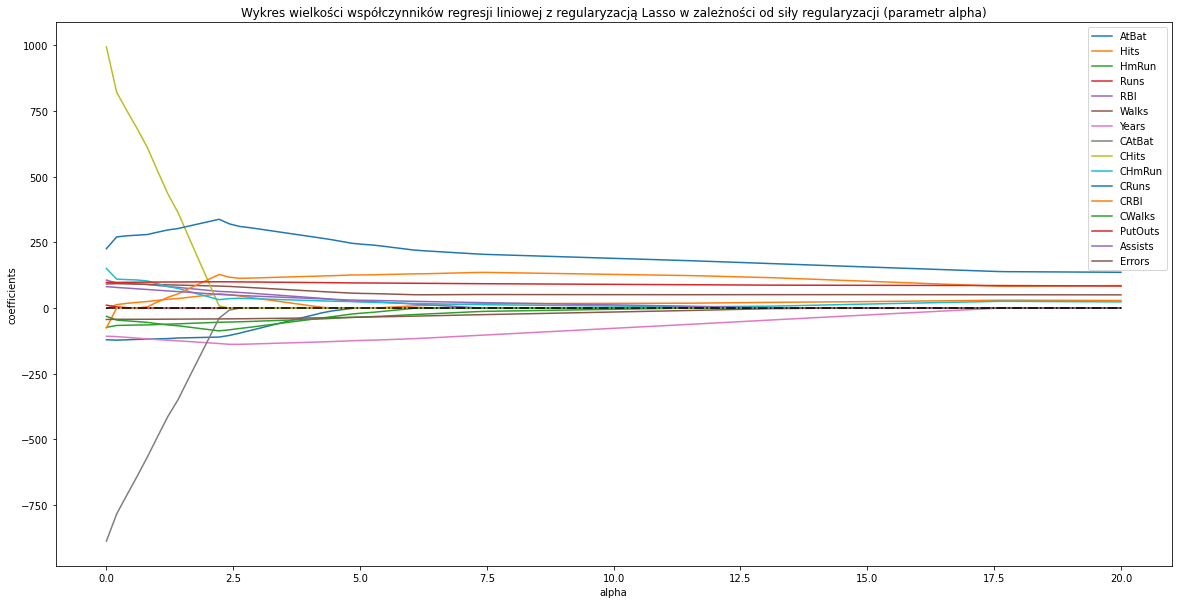

In [121]:
# patrzymy, jak zmieniają się współczynniki beta Lasso wraz ze wzrostem alpha
plt.figure(figsize=(20, 10))

alpha_vec =  np.linspace(0.001, 20, 100)

coefs = []
for a in alpha_vec:
    
    model_lasso_regression = make_pipeline(StandardScaler(), Lasso(alpha = a, max_iter=10_000))
    
    model_lasso_regression.fit(X_train, y_train)
    coefs.append(model_lasso_regression.named_steps['lasso'].coef_)

plt.plot(alpha_vec, coefs)
plt.plot([np.min(alpha_vec), np.max(alpha_vec)], [0, 0], '-.', color='black')
plt.title('Wykres wielkości współczynników regresji liniowej z regularyzacją Lasso w zależności od siły regularyzacji (parametr alpha)')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.legend(X.columns)
plt.show()

## Regresja wielomianowa z regularyzacją lasso

In [122]:
poly_lasso_estimator = make_pipeline(PolynomialFeatures(include_bias=False), StandardScaler(), Lasso(max_iter=10_000))
poly_lasso_estimator

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(max_iter=10000))])

In [123]:
grid2 = GridSearchCV(estimator=poly_lasso_estimator,
                     param_grid={'polynomialfeatures__degree': [1, 2, 3],
                                 'lasso__alpha': np.linspace(5, 15, 20)
                                },
                     scoring='neg_mean_squared_error',
                     cv=10
                     )

grid2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': array([ 5.        ,  5.52631579,  6.05263158,  6.57894737,  7.10526316,
        7.63157895,  8.15789474,  8.68421053,  9.21052632,  9.73684211,
       10.26315789, 10.78947368, 11.31578947, 11.84210526, 12.36842105,
       12.89473684, 13.42105263, 13.94736842, 14.47368421, 15.        ]),
                         'polynomialfeatures__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [124]:
grid2.best_params_ # optymalne parametry (alpha mniejsza niż dla Ridge, zgodnie z oczekiwaniami)

{'lasso__alpha': 5.526315789473684, 'polynomialfeatures__degree': 2}

In [125]:
results_poly_lasso_alpha_opt = pred_model(grid2.best_estimator_, X_test, y_test)
print(results_poly_lasso_alpha_opt)

{'MSE': 104267.10003977398, 'mAE': 134.12003668657644}


## Wyniki końcowe - porównanie

In [126]:
MSES =np.array([[results_linear_regression["MSE"],
       results_ridge_alpha_1["MSE"], results_ridge_alpha_opt["MSE"], results_poly_ridge_alpha_opt["MSE"],
       results_lasso_alpha_1["MSE"], results_lasso_alpha_opt["MSE"], results_poly_lasso_alpha_opt["MSE"]]])

MAES =np.array([[results_linear_regression["mAE"],
       results_ridge_alpha_1["mAE"], results_ridge_alpha_opt["mAE"], results_poly_ridge_alpha_opt["mAE"],
       results_lasso_alpha_1["mAE"], results_lasso_alpha_opt["mAE"], results_poly_lasso_alpha_opt["mAE"]]])

In [127]:
pd.DataFrame(np.concatenate((MSES, MAES), axis=0),
             columns=['linear', 'ridge_alpha=1', 'ridge_alpha_opt', 'ridge_poly_alpha_opt',
                      'lasso_alpha=1', 'lasso_alpha_opt', 'lasso_poly_alpha_opt'],
             index = ["MSE", "mAE"])

,linear,ridge_alpha=1,ridge_alpha_opt,ridge_poly_alpha_opt,lasso_alpha=1,lasso_alpha_opt,lasso_poly_alpha_opt
MSE,153591.366463,134271.042862,130955.969041,131020.951740,141952.860987,136156.993566,104267.100040
mAE,185.789457,176.251563,171.409766,133.611012,176.358182,183.551122,134.120037
